In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a, b, c, d, e = -12, -18, 5, 10, -30
limit = 10
step = 0.01
step_acr = 0.0000001
line_style = '-'
color = 'b'
direct_up = True

In [3]:
def switch_line():
    global line_style
    if line_style == '-':
        line_style = '--'
    else:
        line_style = '-'
    return line_style

In [4]:
def switch_color():
    global color
    if color == 'b':
        color = 'r'
    else:
        color = 'b'
    return color

In [5]:
def func(x):
    f = a*x**4*np.sin(np.cos(x)) + b*x**3 + c*x**2 + d*x + e
    return f

In [6]:
x = np.arange(-limit,limit + step, step)

In [7]:
x_change = [(-limit,limit)]

In [8]:
roots = []
min_value_x = []
min_value = 0
max_value_x = []
max_value = 0
for i in range(len(x)-1):
    if func(x[i]) > 0 and func(x[i+1]) < 0 or func(x[i]) < 0 and func(x[i+1]) > 0:
        x_acr = np.arange(x[i],x[i+1]+step_acr,step_acr)
        for j in range(len(x_acr)-1):
            if func(x_acr[j]) > 0 and func(x_acr[j+1]) < 0 or func(x_acr[j]) < 0 and func(x_acr[j+1]) > 0:
                x_change.append((x_acr[j],'zero'))
                roots.append(round(x_acr[j],2))
    if direct_up:
        if func(x[i]) > func(x[i+1]):
            direct_up = False
            x_change.append((x[i],'dir'))
            if len(max_value_x) == 0:
                max_value_x.append(x[i])
                max_value = func(x[i])
            elif len(max_value_x) > 0:
                if func(x[i]) > max_value:
                    max_value_x.clear()
                    max_value_x.append(x[i])
                    max_value = func(x[i])
                elif func(x[i]) == max_value:
                    max_value_x.append(x[i])
    else:
         if func(x[i]) < func(x[i+1]):
            direct_up = True
            x_change.append((x[i],'dir'))
            if len(min_value_x) == 0:
                min_value_x.append(x[i])
                min_value = func(x[i])
            elif len(min_value_x) > 0:
                if func(x[i]) < min_value:
                    min_value_x.clear()
                    min_value_x.append(x[i])
                    min_value = func(x[i])
                elif func(x[i]) == min_value:
                    min_value_x.append(x[i])

In [9]:
x_change.append((limit,'limit'))

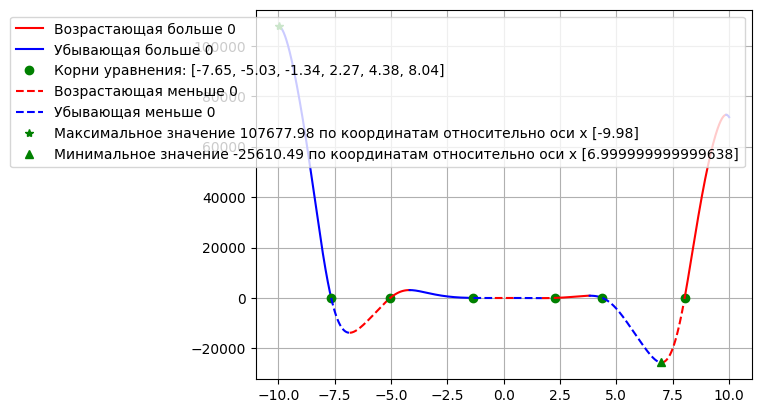

In [10]:
roots_flag, grow_more_0, decr_more_0, grow_less_0, decr_less_0 = True, True, True, True, True
for i in range((len(x_change)-1)):
    cur_x = np.arange(x_change[i][0],x_change[i+1][0]+step,step)
    if x_change[i][1] == 'zero':
        if roots_flag:
            plt.plot(x_change[i][0],func(x_change[i][0]),'go', label = f'Корни уравнения: {roots}')
            roots_flag = False
        else:
            plt.plot(x_change[i][0],func(x_change[i][0]),'go')
        plt.rcParams['lines.linestyle'] = switch_line()
        plt.plot(cur_x,func(cur_x),color)
    else:
        if 0 < func(x_change[i][0]) < func(x_change[i+1][0]) and grow_more_0:
            plt.plot(cur_x,func(cur_x),switch_color(), label = 'Возрастающая больше 0')
            grow_more_0 = False
        elif 0 > func(x_change[i][0]) > func(x_change[i+1][0]) and decr_less_0:
            plt.plot(cur_x,func(cur_x),switch_color(), label = 'Убывающая меньше 0')
            decr_less_0 = False
        elif func(x_change[i][0]) < func(x_change[i+1][0]) < 0 and grow_less_0:
            plt.plot(cur_x,func(cur_x),switch_color(), label = 'Возрастающая меньше 0')
            grow_less_0 = False
        elif func(x_change[i][0]) > func(x_change[i+1][0]) > 0 and decr_more_0:
            plt.plot(cur_x,func(cur_x),switch_color(), label = 'Убывающая больше 0')
            decr_more_0 = False
        else:
            plt.plot(cur_x,func(cur_x),switch_color())
if len(max_value_x) > 0:
    plt.plot(max_value_x[0], max_value, 'g*', label = f'Максимальное значение {round(max_value,2)} по координатам относительно оси х {max_value_x}')
    if len(max_value_x) > 1:
        for i in range(1,len(max_value_x)):
            plt.plot(max_value[i], max_value, 'g*')
if len(min_value_x) > 0:
    plt.plot(min_value_x[0], min_value, 'g^', label = f'Минимальное значение {round(min_value,2)} по координатам относительно оси х {min_value_x}')
    if len(min_value_x) > 1:
        for i in range(1,len(min_value_x)):
            plt.plot(min_value[i], min_value, 'g^')
plt.legend()
plt.grid()